In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/colab file/WS_Pj_2_drugreview/drugsComTrain_raw.tsv', sep="\t")

**drugName : 약 이름  
condition: 증상  
review   : 리뷰  
rating   : 평가점수
date     : 리뷰 작성 날짜  
usefulCount: 공감한 개수 = 좋아요 개수**

In [43]:
df.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160398 non-null  int64  
 1   drugName     160398 non-null  object 
 2   condition    160398 non-null  object 
 3   review       160398 non-null  object 
 4   rating       160398 non-null  float64
 5   date         160398 non-null  object 
 6   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB


In [38]:
df.dropna(subset = ['condition'], inplace = True)

In [ ]:
df['drugName'].unique().sum()

In [25]:
df['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

**Levonorgestrel : norgestrel의 활성형 이성체(경구용 피임제)  
Etonogestrel   : Desogestrel의 활성대사물 (주사 삽입형 피임제)  
Ethinyl estradiol / norethindrone : 이디닐에스트라디올과 노레틴드론 호르몬 함유(복합 경구 피임제)  
Nexplanon      :  임플라논 엔엑스티 이식제 (이식형 피임제)  
Ethinyl estradiol / norgestimate  : 에티닐에스트라디올과 노르게스트레이트 함유 (복합 경구 피임제)  
Ethinyl estradiol / levonorgestrel: 에티닐에스트라디올과 레보노르게스트렐 함유(복합 경구 피임제)  
Phentermine    :(펜타민) 비만환자에게 체중감량의 보조요법으로 단기간 사용하는 식욕억제제  
Sertraline     :(세트랄린) 항우울증, 항불안제(경구용)  
Escitalopram   :(에스시탈로프람) 우울증 치료제(경구용) => 세로토닌의 작용을 선택적으로 높이는 약물  
Mirena         :(미레나) 피임기구(피임장치)  
Implanon       : 피임기구(이식형 피임제)  
Gabapentin     : 신경통 및 발작 치료제, 특정 신경통 치료(경구용)  
Bupropion      : 우울증, 니코틴 중독 치료제(경구용)  
Venlafaxine    : 우울증, 공황장애, 패닉장애(경구용)  
Miconazole     : 진균 감염 치료제 ex) 피부, 발포, 혀 감염 (피부 도포)  
Medroxyprogesterone : 피임, 월경장애 치료(근육주사제)  
Citalopram     : 우울증, 공항장애(경구용)  
Lexapro        : 우울증, 공항장애(경구용)  
Bupropion / naltrexone : 체중 감량 약물(경구용)  
Duloxetine     : 우울증, 고위험 혈압, 요실금, 신경통 치료(경구용)**

In [40]:
df['drugName'].value_counts().head(20)

Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Phentermine                           1538
Sertraline                            1353
Escitalopram                          1287
Mirena                                1242
Implanon                              1102
Gabapentin                            1042
Bupropion                             1017
Venlafaxine                           1012
Miconazole                             998
Citalopram                             994
Medroxyprogesterone                    971
Lexapro                                952
Bupropion / naltrexone                 945
Duloxetine                             931
Name: drugName, dtype: int64

In [ ]:
df['condition'].unique()

**Birth Control : 피임  
Depression : 우울증  
Pain : 통증  
Anxiety  : 불안  
Acne  : 여드름  
Bipolar Disorder : 양극성 장애  
Insomnia : 불면증  
Weight Loss : 체중 감량  
Obesity : 비만  
ADHD : 주의력 결핍 과잉행동 장애  
Diabetes, Type2 : 당뇨병, 제 2형  
Emergency Contraception : 긴급 피임  
High Blood Pressure : 고혈압  
Vaginal Yeast Infection : 질 상 칸디다 감염  
Abnormal Uterine Bleeding : 자궁 이상 출혈  
BowelPreparation : 장 내 시술 전 준비(내시경이나 수술 전에 장 청소용)  
Fibromyalgia : 섬유근육통(만성적인 근육통, 피로감, 수면장애 같은 질병)  
Smoking Cessation : 흡연 중단(금단현상)  
Migraine : 편두통(심한 두통을 특징으로하는 발작성 두통)  
Anxiety and Stress : 일상생활에서 불안과 스트레스**

In [42]:
df['condition'].value_counts().head(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

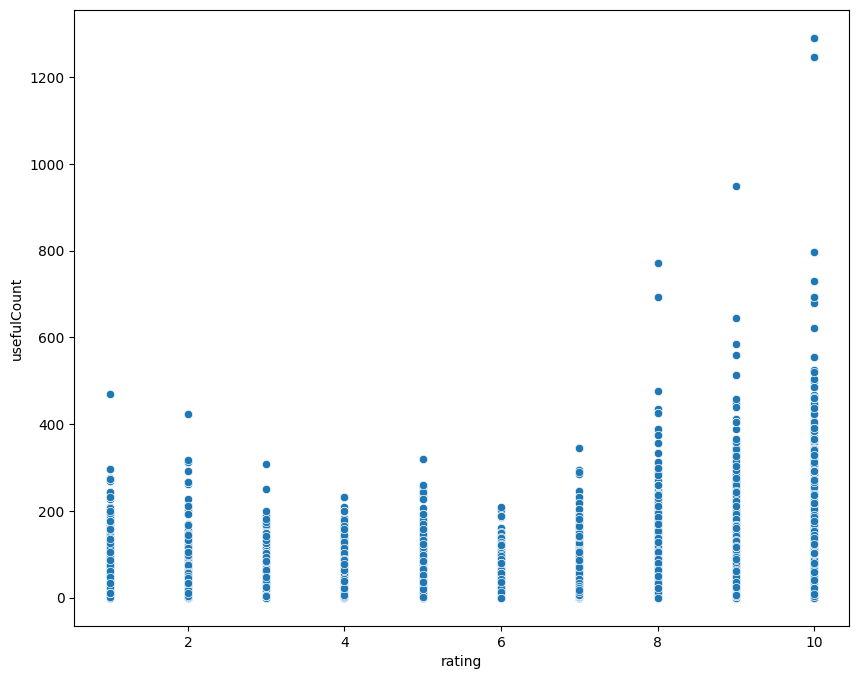

In [44]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'rating', y = 'usefulCount')
plt.xlabel('rating')
plt.ylabel('usefulCount')
plt.show()

In [ ]:
df['usefulCount'].value_counts().tail(20)

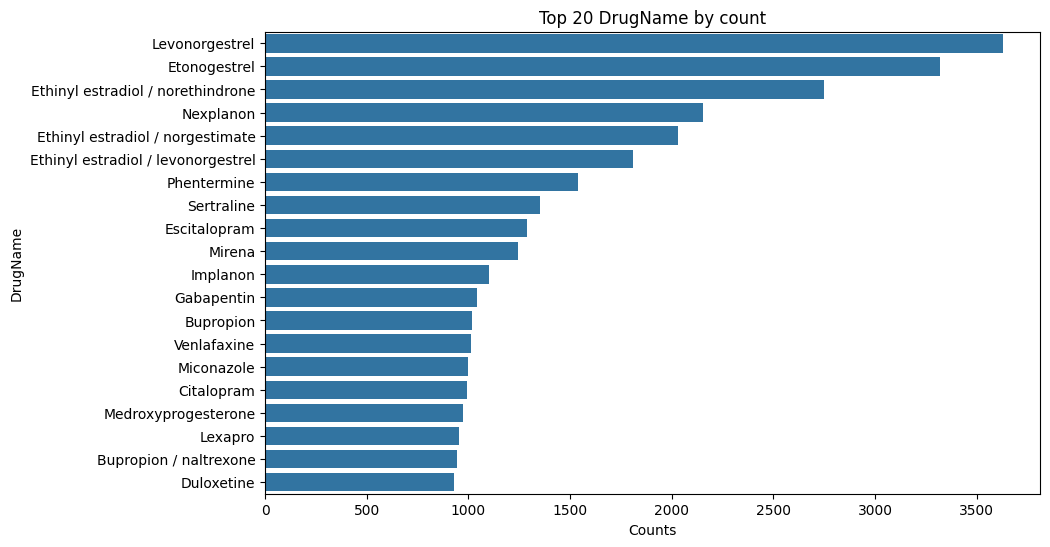

In [55]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, y = 'drugName', order = df['drugName'].value_counts().index[:20] )
plt.title('Top 20 DrugName by count')
plt.xlabel('Counts')
plt.ylabel('DrugName')
plt.show()

평점 평균을 컬럼으로 넣어야하나

In [ ]:
#약의 평균 평점
plt.figure(figsize = (10, 6))
plt.barplot(data = df, y = , x = df['drugName'].value_counts().index[:20])

한 약에 대한 평점 분포

히트맵

In [56]:
df.corr() #별점과 좋아요 수는 상관관계가 있음

<ipython-input-56-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,rating,usefulCount
Unnamed: 0,1.000000,0.014896,0.015945
rating,0.014896,1.000000,0.234379
usefulCount,0.015945,0.234379,1.000000
